In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [88]:
class Game_state():
    
    def __init__(self, player):
        self.player = player
        self.turns = 1
        self.score = 0
        self.data = {}
    
    def game_loop(self):
        while self.turns <= 7:
            self.score += self.player.push()
            self.data[self.turns] = self.score
            self.turns += 1
        return self.data[7]
    

In [57]:
class Player():
    
    def __init__(self):
        pass
    
    def roll(self):
        roll = random.randint(1,6)
        if roll == 1:
            return 0
        else:
            return roll
    
    def push(self):
        self.roll_list = []
        while len(self.roll_list) < 1:
            self.roll_list.append(self.roll)
        return sum(self.roll_list)
    
    

            
        

In [77]:
class Push2player(Player):
    
    def __init__(self):
        super().__init__()
    
    def push(self):
        self.roll_list = []
        for _ in range(2):
            self.roll_list.append(self.roll())
        if 0 in self.roll_list:
            return 0
        else:
            return sum(self.roll_list)
            
class Push3player(Player):

In [78]:
will = Player()
steve = Push2player()

In [79]:
sim1 = Game_state(will)
sim2 = Game_state(steve)

In [80]:
game = sim1.game_loop()
game2 = sim2.game_loop()

In [81]:
print(game)
print(game2)

{1: 4, 2: 4, 3: 8, 4: 11, 5: 15, 6: 18, 7: 22}
{1: 3, 2: 5, 3: 12, 4: 16, 5: 22, 6: 28, 7: 39}


In [91]:
def get_data(player): # takes a instance of player
    simulations = []
    [simulations.append(Game_state(player).game_loop()) for _ in range(20)]
    return simulations
        

In [94]:
data = get_data(Player())
data2 = get_data(Push2player())

In [95]:
print(data)
print(data2)

[29, 28, 21, 25, 22, 21, 26, 19, 29, 15, 26, 21, 26, 34, 21, 16, 25, 20, 19, 16]
[58, 41, 49, 42, 60, 53, 46, 47, 46, 46, 55, 64, 45, 55, 32, 40, 41, 49, 48, 52]


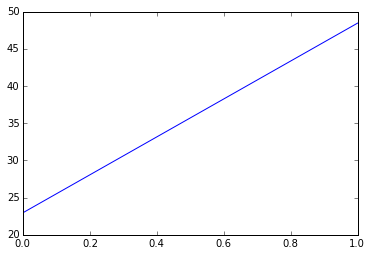

In [98]:
plt.plot([statistics.mean(data), statistics.mean(data2)])
plt.show()